In [2]:
import pandas as pd
import numpy as np
train_features = pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P')
train_labels = pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f')
test_features = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')
train_features.shape, train_labels.shape, test_features.shape, sample_submission.shape

((59400, 40), (59400, 2), (14358, 40), (14358, 2))

DO TRAIN/VALIDATE/TEST SPLIT 

In [6]:
from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=.8, test_size=.2,
    stratify=y_train, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [7]:
y_train.value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [8]:
y_val.value_counts(normalize=True)

functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: status_group, dtype: float64

CLEAN THE DATA

In [11]:
#sklearn can't use non numeric
X_train_num=X_train.select_dtypes('number')
X_val_num = X_val.select_dtypes('number')

In [12]:
X_train_num.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
year_recorded        0
dtype: int64

SELECT FEATURES

In [21]:
cardinality = X_train.describe(exclude='number').T.sort_values(by='unique')

In [22]:
cardinality

,count,unique,top,freq,first,last
recorded_by,47520,1,GeoData Consultants Ltd,47520,NaN,NaN
public_meeting,47520,3,True,40838,NaN,NaN
source_class,47520,3,groundwater,36638,NaN,NaN
permit,47520,3,True,31071,NaN,NaN
quantity,47520,5,enough,26567,NaN,NaN
management_group,47520,5,user-group,42027,NaN,NaN
quality_group,47520,6,good,40598,NaN,NaN
waterpoint_type_group,47520,6,communal standpipe,27642,NaN,NaN
payment_type,47520,7,never pay,20287,NaN,NaN
payment,47520,7,never pay,20287,NaN,NaN


In [23]:
categorical_features =['extraction_type_group']
numeric_features = ['amount_tsh']
features=categorical_features + numeric_features

Do One-Hot Encoding

In [24]:
X_train_subset = X_train[features]
X_val_subset = X_val[features]

In [25]:
import category_encoders as ce
encoder= ce.OneHotEncoder(use_cat_names=True)
X_train_encoded=encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

SCALE FEATURES

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

C:\Users\Kevona Jean\myCODE\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kevona Jean\myCODE\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Kevona Jean\myCODE\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

VALIDATION ACCURACY SCORE

In [29]:
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.6231481481481481


GET/PLOT COOEFFICIENTS

In [30]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)

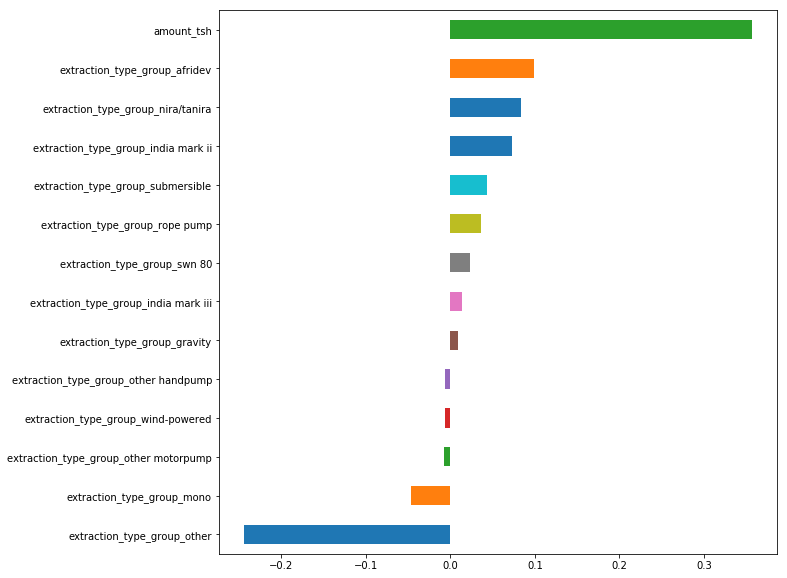

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
coefficients.sort_values().plot.barh();

CREATE SUBMISSION FILE

In [32]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)

C:\Users\Kevona Jean\myCODE\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
all(X_test_encoded.columns == X_train_encoded.columns)

True

In [36]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)